
## 1) Setup — Install & Import
This installs commonly used libraries (skip installation if you're not on Colab) and imports everything we need.


In [1]:

# If you're on Google Colab, uncomment the next line to install (pandas, numpy, matplotlib already available on Colab).
# You can add/remove packages as needed.
# !pip install pandas numpy matplotlib scikit-learn

import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Matplotlib defaults (no explicit colors per instructions)
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['axes.grid'] = True

from pathlib import Path

# Create an export directory for images/tables
EXPORT_DIR = Path('/content/exports')
EXPORT_DIR.mkdir(parents=True, exist_ok=True)

# Helper to save figures consistently
def savefig(name):
    path = EXPORT_DIR / name
    plt.savefig(path, bbox_inches='tight', dpi=150)
    print(f"Saved figure to {path}")



## 2) Data Loading
This cell attempts to read the dataset from Colab's `/content` first.  
If you're running elsewhere, update `DATA_PATH` accordingly.


In [2]:

# Adjust the path if needed
possible_paths = [
    '/content/Airbnb_Open_Data.csv',
    '/content/drive/MyDrive/Airbnb_Open_Data.csv',
    '/mnt/data/Airbnb_Open_Data.csv',  # fallback for local/testing
]
DATA_PATH = None
for p in possible_paths:
    if os.path.exists(p):
        DATA_PATH = p
        break

if DATA_PATH is None:
    raise FileNotFoundError("Could not find 'Airbnb_Open_Data.csv'. Upload it to /content and rerun.")

print("Reading:", DATA_PATH)
df_raw = pd.read_csv(DATA_PATH, low_memory=False)
df = df_raw.copy()
print("Shape:", df.shape)
df.head(3)


Reading: /content/Airbnb_Open_Data.csv
Shape: (21104, 26)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN



## 3) Initial Data Audit
Quick structure, missingness, duplicates, and basic statistics.


In [3]:

# Column overview
print("Columns:", list(df.columns))

# Info
print("\nData Info:")
print(df.info())

# Missing values
missing = df.isna().sum().sort_values(ascending=False)
miss_df = missing.to_frame('missing_count')
display(miss_df.head(20))

# Duplicates
dup_count = df.duplicated().sum()
print(f"\nDuplicate rows: {dup_count}")

# Basic describe (numeric)
display(df.describe(include=[np.number]).T)

# Basic describe (object)
display(df.describe(include=['object']).T.head(30))


Columns: ['id', 'NAME', 'host id', 'host_identity_verified', 'host name', 'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country', 'country code', 'instant_bookable', 'cancellation_policy', 'room type', 'Construction year', 'price', 'service fee', 'minimum nights', 'number of reviews', 'last review', 'reviews per month', 'review rate number', 'calculated host listings count', 'availability 365', 'house_rules', 'license']

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21104 entries, 0 to 21103
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21104 non-null  int64  
 1   NAME                            21028 non-null  object 
 2   host id                         21104 non-null  int64  
 3   host_identity_verified          21009 non-null  object 
 4   host name                       21064 non-null  object 
 5   neighbourhood

,missing_count
license,21103
house_rules,6998
last review,3587
reviews per month,3573
minimum nights,161
availability 365,159
Construction year,147
review rate number,104
host_identity_verified,95
instant_bookable,80



Duplicate rows: 0


,count,mean,std,min,25%,50%,75%,max
id,21104.0,6.828930e+06,3.364802e+06,1.001254e+06,3.915133e+06,6.828930e+06,9.742726e+06,1.265652e+07
host id,21104.0,4.925481e+10,2.848622e+10,1.303496e+08,2.448007e+10,4.914569e+10,7.391924e+10,9.876097e+10
lat,21096.0,4.072959e+01,5.289539e-02,4.049979e+01,4.068980e+01,4.072335e+01,4.076391e+01,4.090804e+01
long,21096.0,-7.395717e+01,3.864540e-02,-7.424285e+01,-7.398328e+01,-7.395815e+01,-7.394178e+01,-7.371299e+01
Construction year,20957.0,2.012475e+03,5.775315e+00,2.003000e+03,2.007000e+03,2.012000e+03,2.017000e+03,2.022000e+03
minimum nights,20943.0,7.833691e+00,3.500182e+01,-1.200000e+01,2.000000e+00,3.000000e+00,5.000000e+00,3.455000e+03
number of reviews,21079.0,3.590991e+01,5.930461e+01,0.000000e+00,1.000000e+00,9.000000e+00,4.500000e+01,6.290000e+02
reviews per month,17531.0,9.214175e-01,1.269975e+00,1.000000e-02,1.000000e-01,3.500000e-01,1.270000e+00,1.622000e+01
review rate number,21000.0,2.994857e+00,1.418139e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
calculated host listings count,21043.0,3.775032e+00,1.317071e+01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,1.210000e+02


,count,unique,top,freq
NAME,21028,20760,Loft Suite @ The Box House Hotel,11
host_identity_verified,21009,2,unconfirmed,10591
host name,21064,6142,Michael,198
neighbourhood group,21077,7,Manhattan,9786
neighbourhood,21088,202,Williamsburg,1916
country,21054,2,United States,21053
country code,21024,1,US,21024
instant_bookable,21024,2,False,10652
cancellation_policy,21053,3,flexible,7066
room type,21103,3,Entire home/apt,11642



## 4) Data Cleaning
- Standardize column names (lowercase, snake_case).
- Strip whitespace for text fields.
- Convert common fields to numeric/datetime.
- Remove exact duplicates.
- Create safe numeric versions of money fields (remove symbols).
- Optional: mild outlier capping for *price*.


In [4]:

# Standardize column names
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(' ', '_')
      .str.replace('-', '_')
)

# Strip whitespace for object fields
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip()

# Helper to coerce money-like columns
def to_numeric_safe(series):
    return (series.astype(str)
                  .str.replace('[\$,]', '', regex=True)
                  .str.replace('None', '', regex=False)
                  .replace(['', 'nan', 'NaN'], np.nan)
                  .astype(float))

# Try common columns
likely_price_cols = ['price', 'service_fee', 'cleaning_fee', 'security_deposit']
for c in likely_price_cols:
    if c in df.columns:
        df[c] = to_numeric_safe(df[c])

# Date columns (best-effort)
for c in ['last_review', 'first_review', 'host_since', 'calendar_last_scraped', 'last_scraped']:
    if c in df.columns:
        df[c] = pd.to_datetime(df[c], errors='coerce')

# Remove exact duplicates
before = df.shape[0]
df = df.drop_duplicates().reset_index(drop=True)
after = df.shape[0]
print(f"Removed {before - after} duplicate rows.")

# Mild outlier cap for price (5th–95th percentile) if present
if 'price' in df.columns:
    p5, p95 = df['price'].quantile(0.05), df['price'].quantile(0.95)
    df['price_capped'] = df['price'].clip(lower=p5, upper=p95)
    print(f"Price clipping between {p5:.2f} and {p95:.2f}")
else:
    print("Column 'price' not found; skipping price capping.")

print("Cleaning complete.")


Removed 0 duplicate rows.
Price clipping between 105.00 and 1139.00
Cleaning complete.


<>:17: SyntaxWarning: invalid escape sequence '\$'
<>:17: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-3733878452.py:17: SyntaxWarning: invalid escape sequence '\$'
  .str.replace('[\$,]', '', regex=True)



## 5) Exploratory Data Analysis (EDA)
Overall distribution checks for important columns and relationships.


Saved figure to /content/exports/hist_price.png


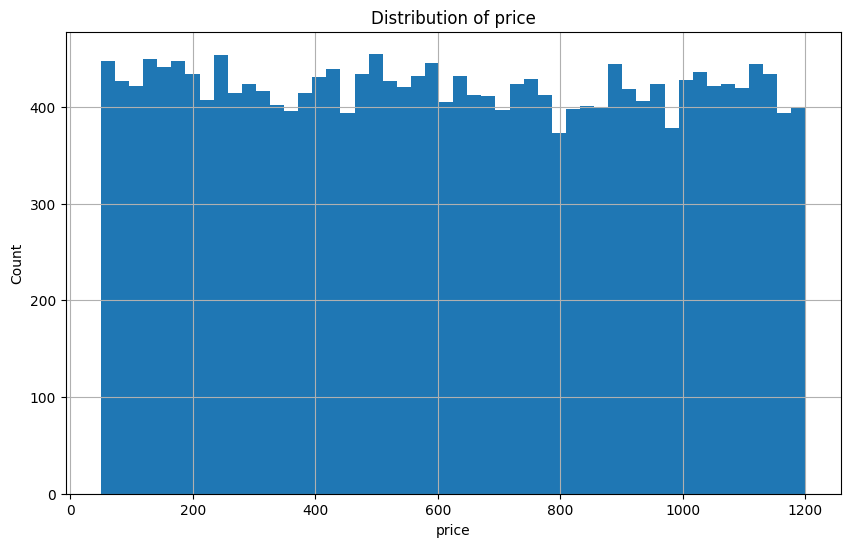

Saved figure to /content/exports/hist_price_capped.png


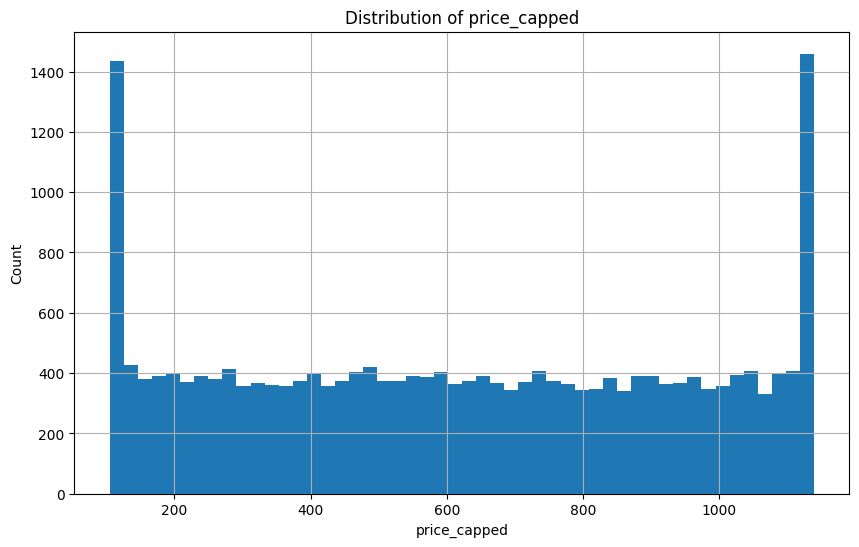

Saved figure to /content/exports/hist_availability_365.png


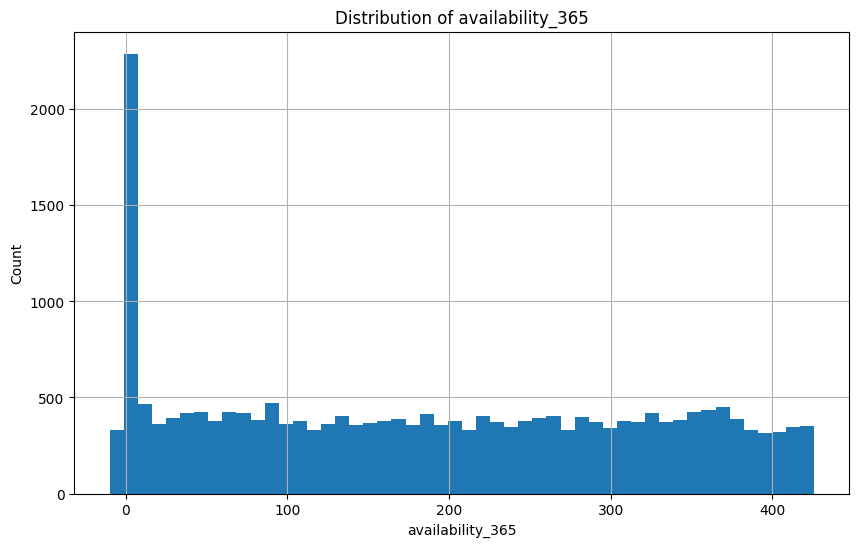

Saved figure to /content/exports/hist_calculated_host_listings_count.png


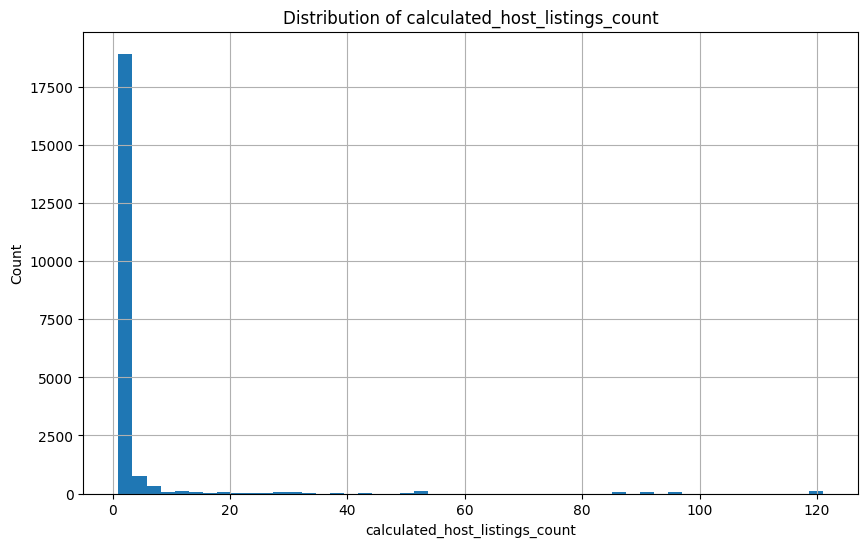

Saved figure to /content/exports/hist_number_of_reviews.png


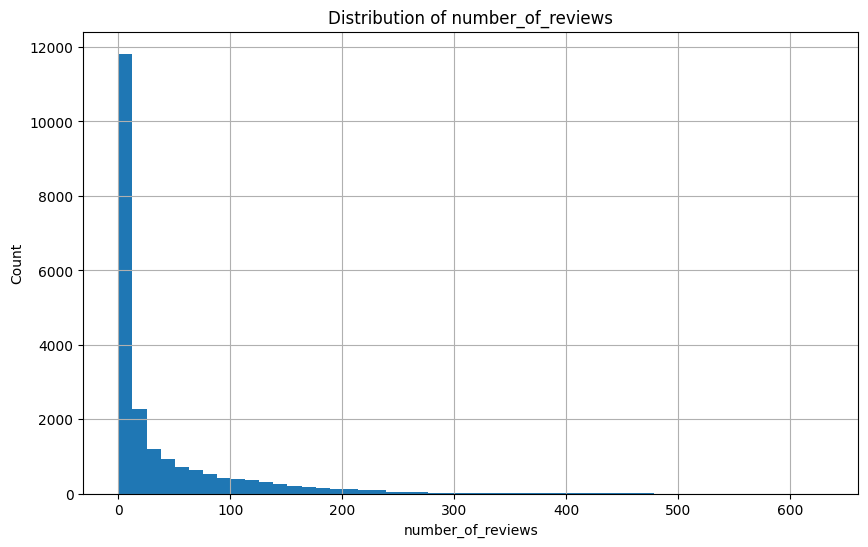

Saved figure to /content/exports/bar_neighbourhood_group.png


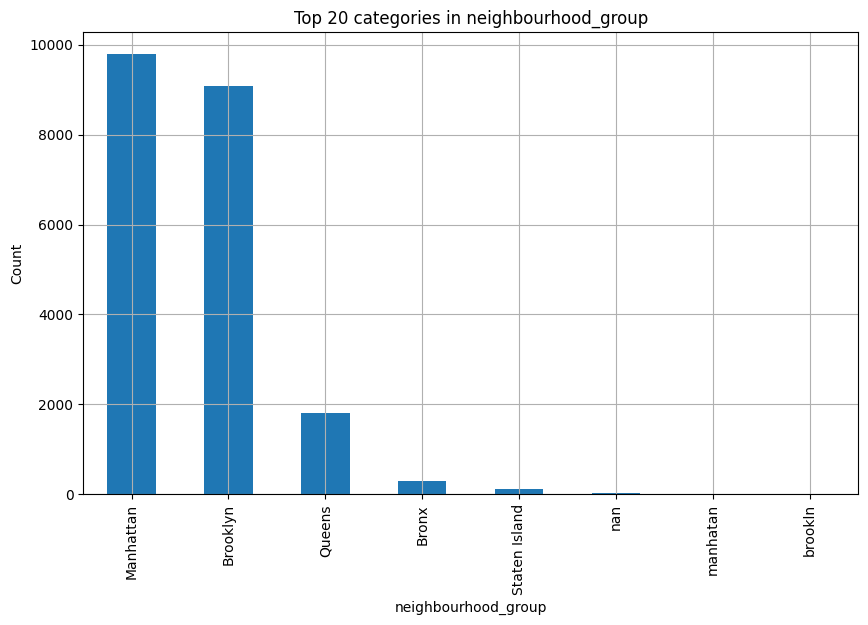

Saved figure to /content/exports/bar_neighbourhood.png


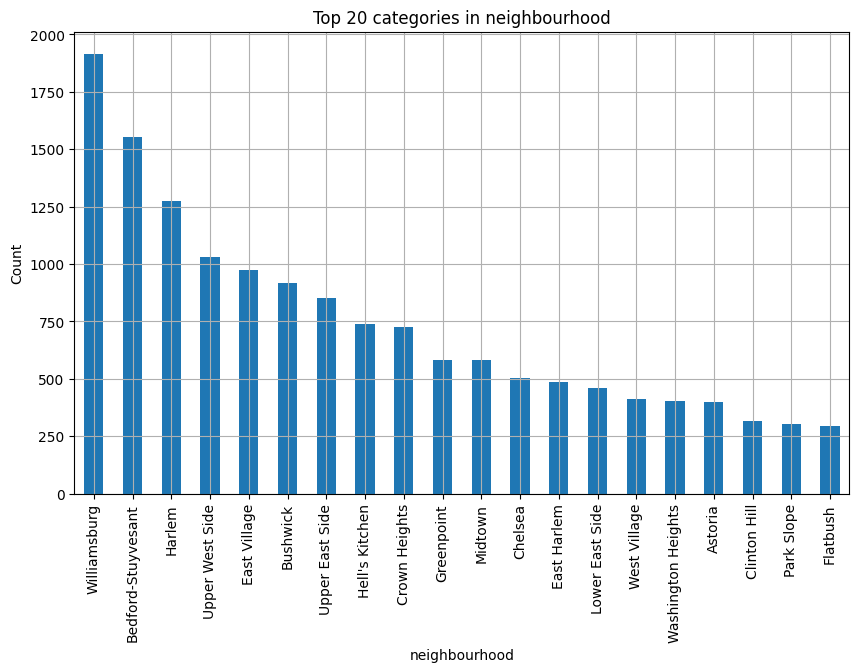

Saved figure to /content/exports/bar_room_type.png


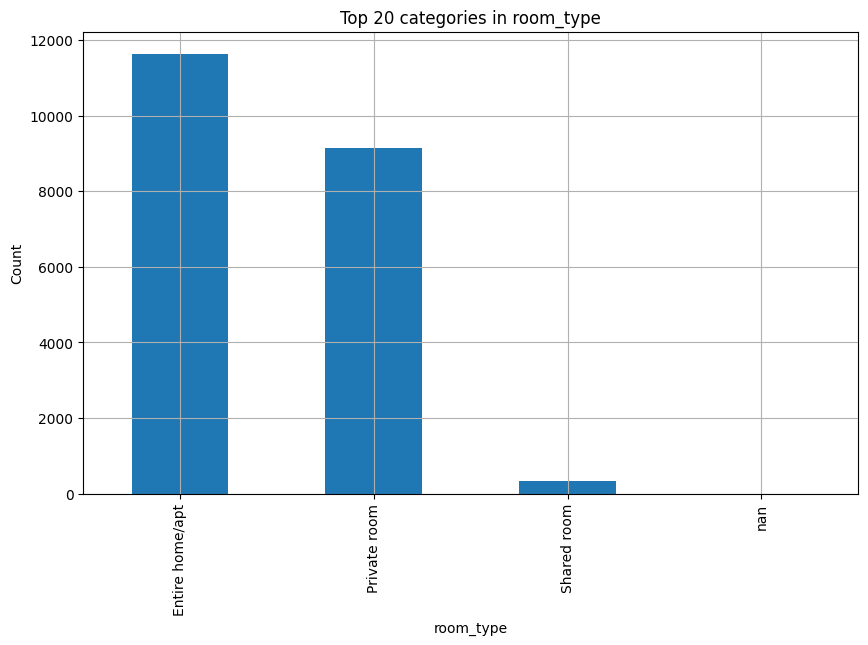

In [5]:

# Utility to plot a histogram if column exists
def hist_if_exists(col, bins=50):
    if col in df.columns:
        plt.figure()
        df[col].dropna().hist(bins=bins)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col); plt.ylabel("Count")
        savefig(f"hist_{col}.png")
        plt.show()

for col in ['price', 'price_capped', 'availability_365', 'calculated_host_listings_count',
            'number_of_reviews']:
    hist_if_exists(col)

# Bar charts for key categorical columns
def bar_if_exists(col, top=20):
    if col in df.columns:
        vc = df[col].value_counts().head(top)
        plt.figure()
        vc.plot(kind='bar')
        plt.title(f"Top {top} categories in {col}")
        plt.xlabel(col); plt.ylabel("Count")
        savefig(f"bar_{col}.png")
        plt.show()

for col in ['neighbourhood_group', 'neighborhood_group', 'neighbourhood', 'neighborhood',
            'room_type', 'property_type']:
    bar_if_exists(col, top=20)



## 6) Research Questions — Step‑by‑Step
Each subsection answers a specific question, printing key tables and saving figures to `/content/exports`.



### Q1) What are the different property types in the dataset?


In [6]:

q1_col = 'property_type' if 'property_type' in df.columns else None
if q1_col:
    unique_props = df[q1_col].dropna().unique()
    print(f"Property types (n={len(unique_props)}):")
    print(sorted(unique_props)[:100])
    # Frequency plot
    vc = df[q1_col].value_counts().head(25)
    plt.figure()
    vc.plot(kind='bar')
    plt.title("Top 25 Property Types")
    plt.xlabel("property_type"); plt.ylabel("Count")
    savefig("q1_property_types.png")
    plt.show()
else:
    print("Column 'property_type' not found in dataset.")


Column 'property_type' not found in dataset.



### Q2) Which neighborhood group has the highest number of listings?


,listing_count
neighbourhood_group,
Manhattan,9786
Brooklyn,9086
Queens,1799
Bronx,294
Staten Island,110
nan,27
manhatan,1
brookln,1


Neighborhood group with the most listings: Manhattan
Saved figure to /content/exports/q2_neighborhood_group_counts.png


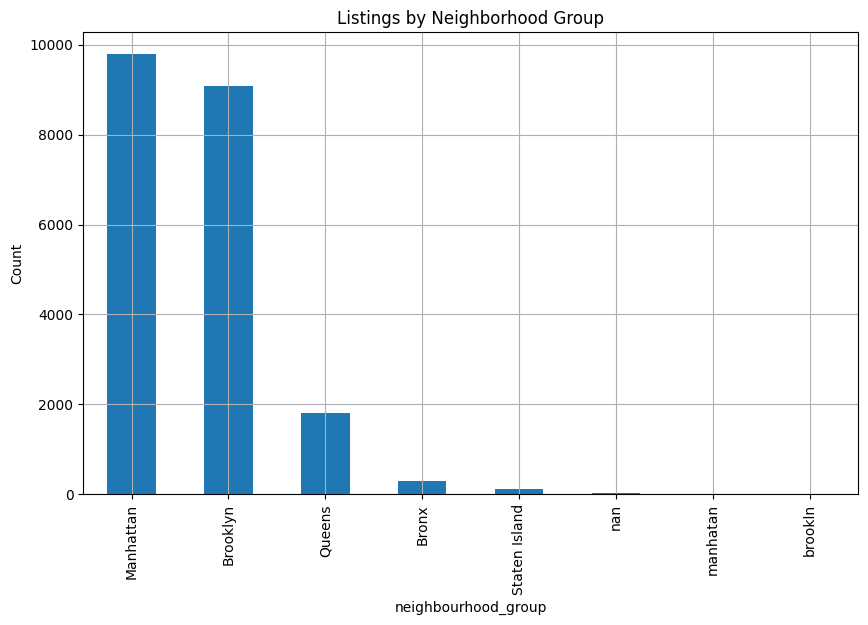

In [7]:

# Handle both British/American spellings
ng_col = None
for cand in ['neighbourhood_group', 'neighborhood_group']:
    if cand in df.columns:
        ng_col = cand; break

if ng_col:
    counts = df[ng_col].value_counts(dropna=False)
    display(counts.to_frame('listing_count'))
    top_group = counts.idxmax()
    print(f"Neighborhood group with the most listings: {top_group}")
    plt.figure()
    counts.plot(kind='bar')
    plt.title("Listings by Neighborhood Group")
    plt.xlabel(ng_col); plt.ylabel("Count")
    savefig("q2_neighborhood_group_counts.png")
    plt.show()
else:
    print("No 'neighbourhood_group' / 'neighborhood_group' column found.")



### Q3) Which neighborhood group has the highest average prices for Airbnb listings?


,avg_price
neighbourhood_group,
nan,690.269231
Queens,628.227602
Staten Island,622.318182
Manhattan,619.738029
Brooklyn,618.955840
Bronx,599.563140
brookln,580.000000
manhatan,460.000000


Neighborhood group with highest avg price: nan
Saved figure to /content/exports/q3_avg_price_by_group.png


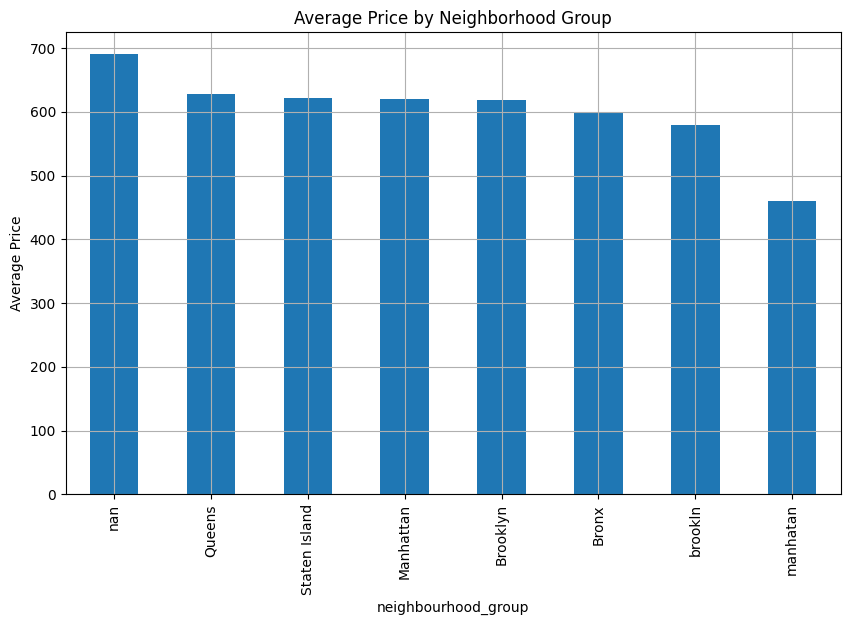

In [8]:

if ng_col and 'price' in df.columns:
    avg_price = df.groupby(ng_col)['price'].mean().sort_values(ascending=False)
    display(avg_price.to_frame('avg_price'))
    top_group_price = avg_price.index[0]
    print(f"Neighborhood group with highest avg price: {top_group_price}")
    plt.figure()
    avg_price.plot(kind='bar')
    plt.title("Average Price by Neighborhood Group")
    plt.xlabel(ng_col); plt.ylabel("Average Price")
    savefig("q3_avg_price_by_group.png")
    plt.show()
else:
    print("Required columns for Q3 not found (need neighborhood_group & price).")



### Q4) Is there a relationship between the construction year of property and price?
(We look for any of: `construction_year`, `year_built`, or `built_year`.)  
If not available, we report unavailability.


Pearson correlation between construction_year and price: 0.0040
Saved figure to /content/exports/q4_year_vs_price.png


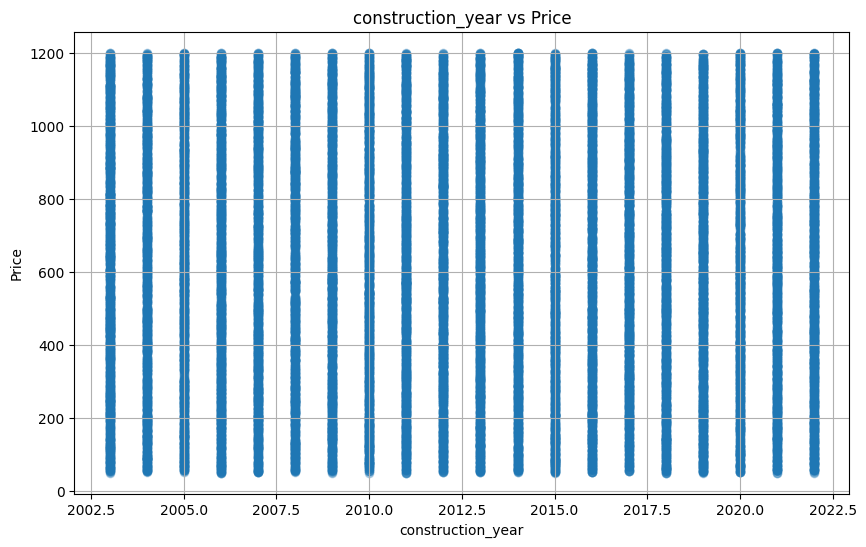

In [9]:

year_col = None
for cand in ['construction_year', 'year_built', 'built_year']:
    if cand in df.columns:
        year_col = cand; break

if year_col and 'price' in df.columns:
    tmp = df[[year_col, 'price']].dropna()
    if not tmp.empty:
        corr = tmp[year_col].corr(tmp['price'])
        print(f"Pearson correlation between {year_col} and price: {corr:.4f}")
        # Scatter
        plt.figure()
        plt.scatter(tmp[year_col], tmp['price'], alpha=0.3)
        plt.title(f"{year_col} vs Price")
        plt.xlabel(year_col); plt.ylabel("Price")
        savefig("q4_year_vs_price.png")
        plt.show()
    else:
        print(f"No overlapping non-null data for {year_col} and price.")
else:
    print("Construction year not available; tried ['construction_year','year_built','built_year'].")



### Q5) Who are the top 10 hosts by calculated host listings count?


,host_id,host_name,calculated_host_listings_count
0,97189467494,Kara,121.0
1,58122584658,Kara,121.0
2,58918277004,Kara,121.0
3,42578211638,Kara,121.0
4,90447510730,Kara,121.0
5,5179408504,Kara,121.0
6,50445710041,Kara,121.0
7,76779975644,Kara,121.0
8,21406215420,Kara,121.0
9,47410339737,Kara,121.0


Saved figure to /content/exports/q5_top_hosts.png


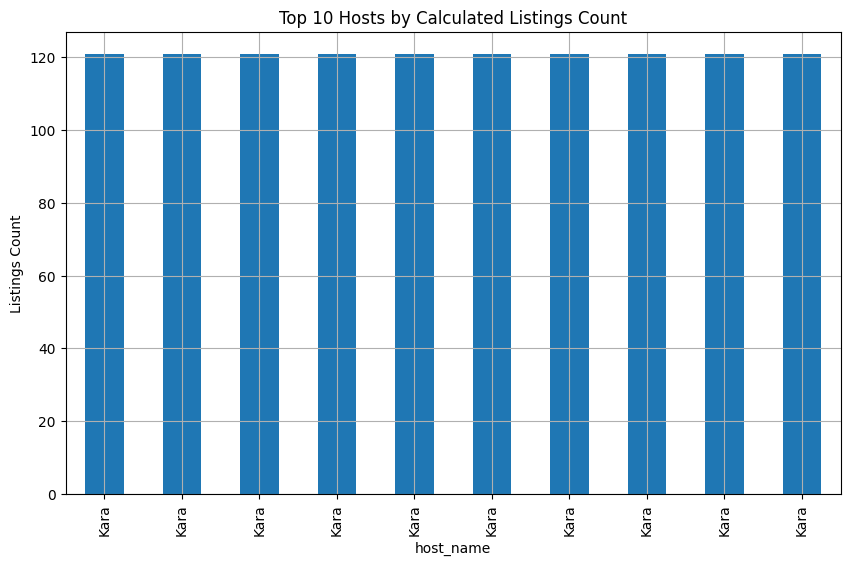

In [10]:

host_id_col = 'host_id' if 'host_id' in df.columns else None
host_name_col = 'host_name' if 'host_name' in df.columns else None
count_col = 'calculated_host_listings_count' if 'calculated_host_listings_count' in df.columns else None

if count_col and host_id_col:
    top_hosts = (df.groupby([host_id_col, host_name_col] if host_name_col else [host_id_col])[count_col]
                   .max()
                   .sort_values(ascending=False)
                   .head(10)
                   .reset_index())
    display(top_hosts)
    # Bar chart
    plt.figure()
    to_plot = top_hosts.copy()
    label_col = host_name_col if host_name_col else host_id_col
    to_plot.index = to_plot[label_col].astype(str)
    to_plot[count_col].plot(kind='bar')
    plt.title("Top 10 Hosts by Calculated Listings Count")
    plt.xlabel(label_col); plt.ylabel("Listings Count")
    savefig("q5_top_hosts.png")
    plt.show()
else:
    print("Missing 'calculated_host_listings_count' or 'host_id'.")



### Q6) Are hosts with verified identities more likely to receive positive reviews?
We approximate **positive reviews** with `review_scores_rating` (≥ 4.5 out of 5 or ≥ 90 out of 100).  
We check for a column `host_identity_verified` (boolean/yes/no/verified/unverified).


,mean,count
,positive,positive
verified,,
True,0.204278,10378


Mean = share of positive reviews.
Saved figure to /content/exports/q6_verified_vs_positive.png


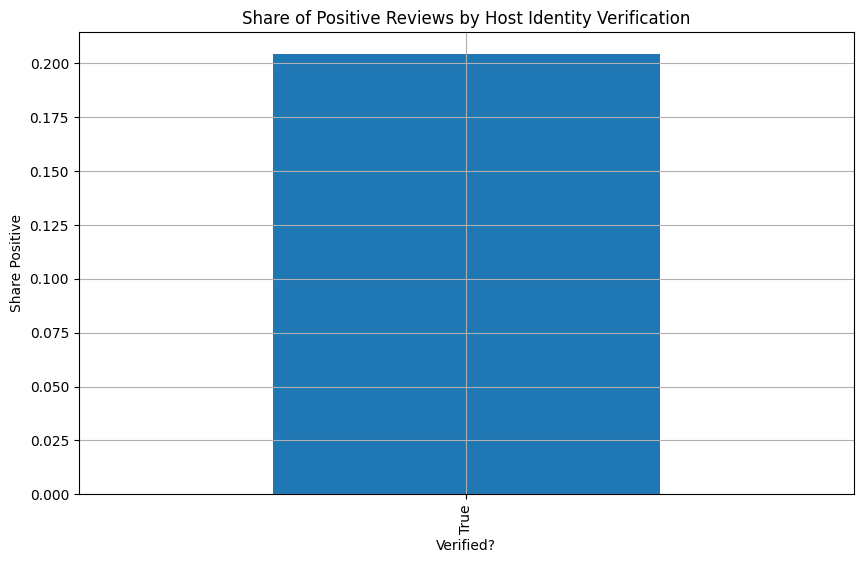

In [11]:

def normalize_boolish(x):
    if pd.isna(x): return np.nan
    s = str(x).strip().lower()
    if s in ['t','true','yes','y','1','verified']:
        return True
    if s in ['f','false','no','n','0','unverified']:
        return False
    return np.nan

id_col = 'host_identity_verified' if 'host_identity_verified' in df.columns else None
rating_col = None
for cand in ['review_scores_rating', 'review_rate_number', 'review_rating']:
    if cand in df.columns:
        rating_col = cand; break

if id_col and rating_col:
    tmp = df[[id_col, rating_col]].dropna().copy()
    tmp['verified'] = tmp[id_col].apply(normalize_boolish)
    # unify rating scale to 0–5 if it looks like 0–100
    scale = 5.0
    if tmp[rating_col].dropna().quantile(0.99) > 10:
        scale = 100.0
    # positive threshold
    if scale == 100.0:
        tmp['positive'] = tmp[rating_col] >= 90
    else:
        tmp['positive'] = tmp[rating_col] >= 4.5

    pivot = tmp.pivot_table(index='verified', values='positive', aggfunc=['mean','count'])
    display(pivot)
    print("Mean = share of positive reviews.")

    # Bar
    share = tmp.groupby('verified')['positive'].mean().rename('share_positive')
    plt.figure()
    share.plot(kind='bar')
    plt.title("Share of Positive Reviews by Host Identity Verification")
    plt.xlabel("Verified?"); plt.ylabel("Share Positive")
    savefig("q6_verified_vs_positive.png")
    plt.show()
else:
    print("Missing 'host_identity_verified' and/or a review rating column.")



### Q7) Is there a correlation between the price of a listing and its service fee?


Pearson correlation (price vs service_fee): 1.0000
Saved figure to /content/exports/q7_price_vs_service_fee.png


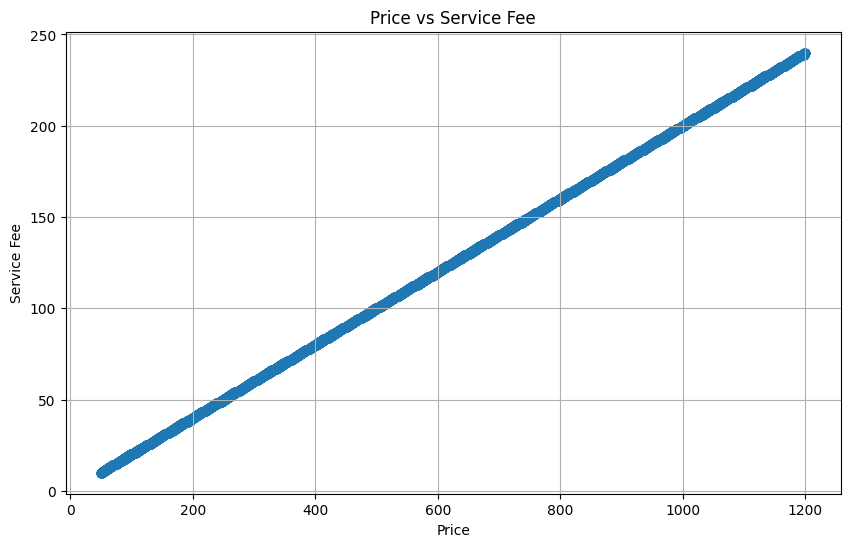

In [12]:

if 'price' in df.columns and 'service_fee' in df.columns:
    tmp = df[['price', 'service_fee']].dropna()
    if not tmp.empty:
        corr = tmp['price'].corr(tmp['service_fee'])
        print(f"Pearson correlation (price vs service_fee): {corr:.4f}")
        # Scatter
        plt.figure()
        plt.scatter(tmp['price'], tmp['service_fee'], alpha=0.3)
        plt.title("Price vs Service Fee")
        plt.xlabel("Price"); plt.ylabel("Service Fee")
        savefig("q7_price_vs_service_fee.png")
        plt.show()
    else:
        print("No overlapping non-null values for price & service_fee.")
else:
    print("Required columns not found: need 'price' and 'service_fee'.")



### Q8) What is the average review rate number (e.g., stars) for listings, and does it vary by neighborhood group and room type?


Overall average rating (review_rate_number): 2.99


,avg_rating
neighbourhood_group,
brookln,4.000000
nan,3.240000
Staten Island,3.186916
Manhattan,3.016944
manhatan,3.000000
Queens,2.977741
Brooklyn,2.974552
Bronx,2.897611


Saved figure to /content/exports/q8_avg_rating_by_group.png


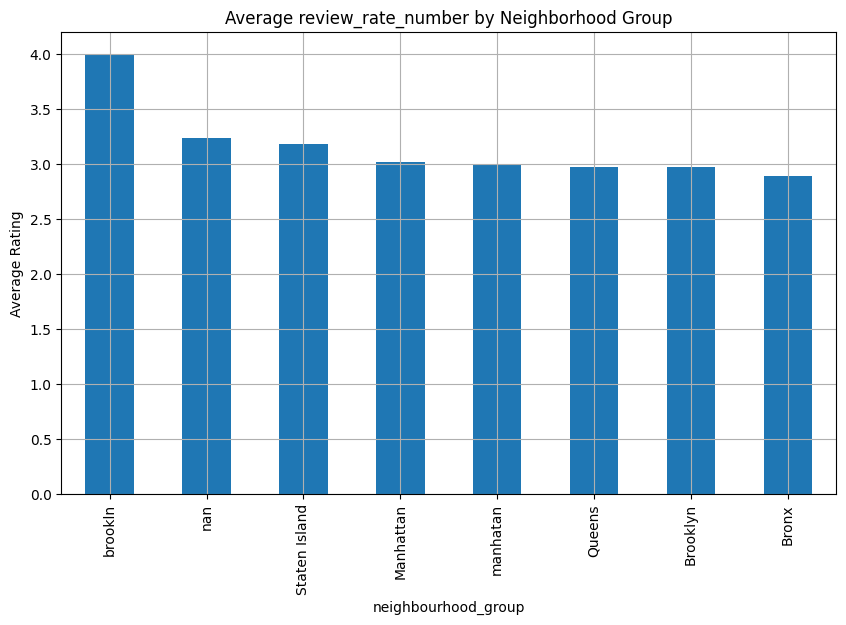

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,2.936364,2.880682,2.714286
Brooklyn,2.958126,2.988581,3.114035
Manhattan,3.027072,3.003696,2.926380
Queens,2.954357,2.987415,3.146341
Staten Island,3.134615,3.236364,NaN
brookln,NaN,4.000000,NaN
manhatan,NaN,3.000000,NaN
nan,3.222222,3.250000,NaN


Saved figure to /content/exports/q8_heatmap_group_room_rating.png


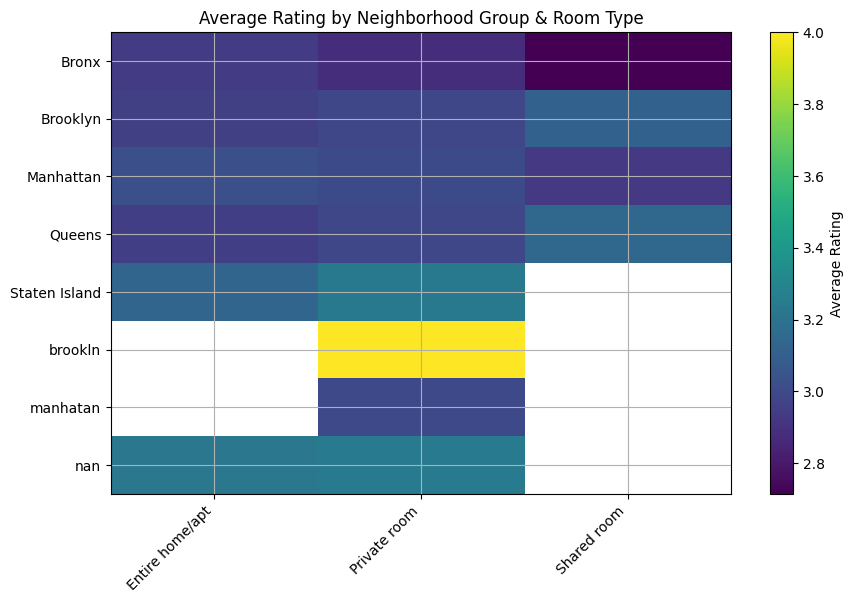

In [13]:

rating_col = None
for cand in ['review_scores_rating', 'review_rate_number', 'review_rating']:
    if cand in df.columns:
        rating_col = cand; break

room_col = 'room_type' if 'room_type' in df.columns else None

if rating_col:
    overall_avg = df[rating_col].mean()
    print(f"Overall average rating ({rating_col}): {overall_avg:.2f}")
    # by group
    if ng_col:
        avg_by_group = df.groupby(ng_col)[rating_col].mean().sort_values(ascending=False)
        display(avg_by_group.to_frame('avg_rating'))
        plt.figure()
        avg_by_group.plot(kind='bar')
        plt.title(f"Average {rating_col} by Neighborhood Group")
        plt.xlabel(ng_col); plt.ylabel("Average Rating")
        savefig("q8_avg_rating_by_group.png")
        plt.show()
    if ng_col and room_col:
        pivot = df.pivot_table(index=ng_col, columns=room_col, values=rating_col, aggfunc='mean')
        display(pivot)
        plt.figure()
        # heatmap via imshow
        mat = pivot.values
        plt.imshow(mat, aspect='auto')
        plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45, ha='right')
        plt.yticks(range(len(pivot.index)), pivot.index)
        plt.colorbar(label='Average Rating')
        plt.title("Average Rating by Neighborhood Group & Room Type")
        savefig("q8_heatmap_group_room_rating.png")
        plt.show()
else:
    print("No review rating column found.")



### Q9) Are hosts with a higher calculated host listings count more likely to maintain higher availability throughout the year?
(We examine correlation between `calculated_host_listings_count` and `availability_365`, and visualize the relationship.)


Pearson correlation (host listings count vs availability_365): 0.0554
Saved figure to /content/exports/q9_listings_vs_availability.png


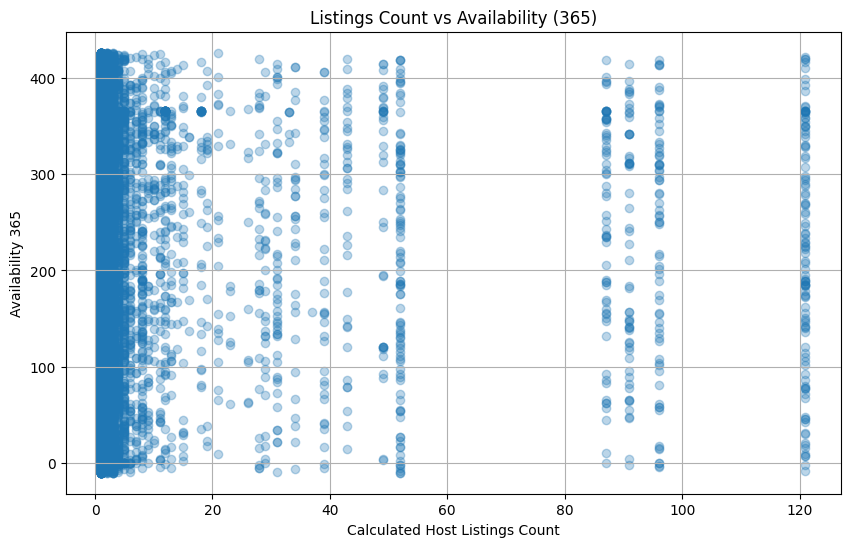

/tmp/ipython-input-877350784.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_avg = tmp.groupby('host_size_bin')['availability_365'].mean()


,avg_availability
host_size_bin,
"(0.999, 2.0]",183.099319
"(2.0, 121.0]",205.358892


In [14]:

if 'calculated_host_listings_count' in df.columns and 'availability_365' in df.columns:
    tmp = df[['calculated_host_listings_count', 'availability_365']].dropna()
    if not tmp.empty:
        corr = tmp['calculated_host_listings_count'].corr(tmp['availability_365'])
        print(f"Pearson correlation (host listings count vs availability_365): {corr:.4f}")
        plt.figure()
        plt.scatter(tmp['calculated_host_listings_count'], tmp['availability_365'], alpha=0.3)
        plt.title("Listings Count vs Availability (365)")
        plt.xlabel("Calculated Host Listings Count"); plt.ylabel("Availability 365")
        savefig("q9_listings_vs_availability.png")
        plt.show()
        # Optional: bin by host size
        tmp['host_size_bin'] = pd.qcut(tmp['calculated_host_listings_count'], q=5, duplicates='drop')
        bin_avg = tmp.groupby('host_size_bin')['availability_365'].mean()
        display(bin_avg.to_frame('avg_availability'))
    else:
        print("No overlapping non-null values for the two columns.")
else:
    print("Required columns for Q9 not found.")



## 7) Export Key Tables
Saves representative result tables (where available) as CSVs in `/content/exports`.


In [15]:

def safe_export(df_obj, name):
    if df_obj is None:
        return
    path = EXPORT_DIR / name
    df_obj.to_csv(path, index=True)
    print(f"Saved: {path}")

# Example exports (guarded by existence)
# Q2 export
if ng_col:
    counts = df[ng_col].value_counts(dropna=False)
    safe_export(counts.to_frame('listing_count'), "q2_neighborhood_group_counts.csv")

# Q3 export
if ng_col and 'price' in df.columns:
    avg_price = df.groupby(ng_col)['price'].mean().sort_values(ascending=False)
    safe_export(avg_price.to_frame('avg_price'), "q3_avg_price_by_group.csv")

# Q5 export
if 'calculated_host_listings_count' in df.columns and ('host_id' in df.columns or 'host_name' in df.columns):
    host_id_col = 'host_id' if 'host_id' in df.columns else None
    host_name_col = 'host_name' if 'host_name' in df.columns else None
    top_hosts = (df.groupby([host_id_col, host_name_col] if host_name_col else [host_id_col])['calculated_host_listings_count']
                   .max()
                   .sort_values(ascending=False)
                   .head(10)
                   .reset_index())
    safe_export(top_hosts, "q5_top_hosts.csv")


Saved: /content/exports/q2_neighborhood_group_counts.csv
Saved: /content/exports/q3_avg_price_by_group.csv
Saved: /content/exports/q5_top_hosts.csv



## 8) Appendix — Optional Filters
Quick helpers to filter the dataset for ad‑hoc exploration.


In [16]:

def filter_by_price(df, min_price=None, max_price=None):
    out = df.copy()
    if 'price' in out.columns:
        if min_price is not None:
            out = out[out['price'] >= min_price]
        if max_price is not None:
            out = out[out['price'] <= max_price]
    return out

# Example:
# df_filtered = filter_by_price(df, min_price=50, max_price=300)
# display(df_filtered.head())
